In [1]:
import pandas as pd

from  helpers.helpers  import *

from datetime import datetime
import matplotlib.pyplot as plt 
from pandas.plotting import table
import numpy as np 
from PIL import Image
import pyarrow


token, chat = bot()


file_path_analitco = r"\\192.168.10.21\saturno\24 - MIS\07 - TIM\02 - Hora a Hora\01 - Output Bases\Relatorio Analitico- FORMATO PARQUET"
arquivo_mais_recente_analitico = last_file(file_path=file_path_analitco)

arquivo_mais_recente_analitico

'\\\\192.168.10.21\\saturno\\24 - MIS\\07 - TIM\\02 - Hora a Hora\\01 - Output Bases\\Relatorio Analitico- FORMATO PARQUET\\Bases_Acionamentos2023-12-04.parquet'

In [3]:
import imaplib
import email
from email.header import decode_header

# Configurações de acesso ao servidor IMAP do Meireles e Freitas
username = 'janathanplanas@meirelesefreitas.com.br'
password = 'Pl@nas114724'
imap_server = 'imap.meirelesefreitas.com.br'

# Conectar-se ao servidor IMAP do Meireles e Freitas
mail = imaplib.IMAP4_SSL(imap_server)
mail.login(username, password)

# Selecionar a caixa de entrada (inbox)
mail.select('inbox')

# Pesquisar por emails com o assunto específico
status, messages = mail.search(None, 'SUBJECT', 'Falha ao atualizar: falha na atualização do Quartil')

# Loop pelos IDs dos emails
for mail_id in messages[0].split():
    # Obter o email
    status, msg = mail.fetch(mail_id, '(RFC822)')
    raw_email = msg[0][1]
    email_message = email.message_from_bytes(raw_email)
    
    # Extraindo informações do email
    subject = decode_header(email_message["Subject"])[0][0]
    subject = subject.decode() if isinstance(subject, bytes) else subject
    
    from_ = email_message.get("From")
    date_ = email_message.get("Date")
    
    # Verificar se há múltiplos conteúdos (texto, HTML, anexos, etc.)
    if email_message.is_multipart():
        for part in email_message.walk():
            content_type = part.get_content_type()
            content_disposition = str(part.get("Content-Disposition"))
            try:
                body = part.get_payload(decode=True).decode()
            except:
                pass
            if content_type == "text/plain" and "attachment" not in content_disposition:
                # Extrair texto do corpo do email
                print("Corpo do Email:")
                print(body)
    else:
        # Se o email não é multipart, extrai o texto do corpo do email
        body = email_message.get_payload(decode=True).decode()
        print("Corpo do Email:")
        print(body)

# Fechar a conexão com o servidor IMAP
mail.close()
mail.logout()


gaierror: [Errno 11001] getaddrinfo failed

In [52]:
token = "6544006198:AAG8OQSnoIgUJCRzh8mBjQomhWDaqJ6guCM" 

In [53]:
url = f"https://api.telegram.org/bot{token}/getChats"

# Envia a requisição GET para a API do Telegram
response = requests.get(url)
response

<Response [404]>

In [49]:
import requests
from telebot import TeleBot

def get_chat_id(token, chat_name):
    # Define o endpoint da API do Telegram para obter informações sobre os chats do bot
    url = f"https://api.telegram.org/bot{token}/getChats"
    
    # Envia a requisição GET para a API do Telegram
    response = requests.get(url)
    
    # Verifica se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Obtém as informações da resposta em formato JSON
        data = response.json()
        
        # Itera pelos chats para encontrar o chat com o nome especificado
        for chat in data:
            chat_title = chat.get('title', '')
            chat_id = chat.get('id', '')
            
            # Verifica se o título do chat corresponde ao chat_name especificado
            if chat_title == chat_name:
                return chat_id
    
    # Retorna None caso não encontre o chat ou ocorra algum erro na requisição
    return None

# Substitua 'SEU_TOKEN' pelo token do seu bot
token = "6544006198:AAG8OQSnoIgUJCRzh8mBjQomhWDaqJ6guCM" 
chat_name = "Tim Reports"

chat_id = get_chat_id(token, chat_name)

# Cria um objeto Bot
bot = TeleBot(token)

# Envia uma mensagem para o tópico Bases
bot.send_message(chat_id, "Olá, pessoal!")


ApiTelegramException: A request to the Telegram API was unsuccessful. Error code: 400. Description: Bad Request: chat not found

In [19]:
import pandas as pd
updates = pd.json_normalize(response.json() ,max_level= 1)
updates['result'][0]

[{'update_id': 473459593,
  'message': {'message_id': 1,
   'from': {'id': 1087968824,
    'is_bot': True,
    'first_name': 'Group',
    'username': 'GroupAnonymousBot'},
   'sender_chat': {'id': -1002120005947,
    'title': 'Tim Reports',
    'type': 'supergroup'},
   'chat': {'id': -1002120005947,
    'title': 'Tim Reports',
    'type': 'supergroup'},
   'date': 1701389666,
   'migrate_from_chat_id': -984227354}},
 {'update_id': 473459594,
  'message': {'message_id': 16408,
   'from': {'id': 770780126,
    'is_bot': False,
    'first_name': 'Janathan',
    'last_name': 'Planas',
    'username': 'PlanasJr',
    'language_code': 'pt-br'},
   'chat': {'id': -984227354,
    'title': 'Tim Reports',
    'type': 'group',
    'all_members_are_administrators': False},
   'date': 1701389666,
   'migrate_to_chat_id': -1002120005947}},
 {'update_id': 473459595,
  'my_chat_member': {'chat': {'id': -1002120005947,
    'title': 'Tim Reports',
    'is_forum': True,
    'type': 'supergroup'},
   'fr

In [9]:
updates['result']

[{'update_id': 473459593,
  'message': {'message_id': 1,
   'from': {'id': 1087968824,
    'is_bot': True,
    'first_name': 'Group',
    'username': 'GroupAnonymousBot'},
   'sender_chat': {'id': -1002120005947,
    'title': 'Tim Reports',
    'type': 'supergroup'},
   'chat': {'id': -1002120005947,
    'title': 'Tim Reports',
    'type': 'supergroup'},
   'date': 1701389666,
   'migrate_from_chat_id': -984227354}},
 {'update_id': 473459594,
  'message': {'message_id': 16408,
   'from': {'id': 770780126,
    'is_bot': False,
    'first_name': 'Janathan',
    'last_name': 'Planas',
    'username': 'PlanasJr',
    'language_code': 'pt-br'},
   'chat': {'id': -984227354,
    'title': 'Tim Reports',
    'type': 'group',
    'all_members_are_administrators': False},
   'date': 1701389666,
   'migrate_to_chat_id': -1002120005947}},
 {'update_id': 473459595,
  'my_chat_member': {'chat': {'id': -1002120005947,
    'title': 'Tim Reports',
    'is_forum': True,
    'type': 'supergroup'},
   'fr

In [ ]:
# Se o chat_id foi encontrado
if chat_id:
    # Define a mensagem e o chat_id para enviar a mensagem específica para esse fórum
    message = "Sua mensagem para o fórum específico"
    data = {"chat_id": chat_id, "text": message}
    
    # Monta a URL da API do Telegram com o token do bot
    url = f"https://api.telegram.org/bot{token}/sendMessage"
    
    # Envia a requisição POST para a URL com os dados da mensagem
    response = requests.post(url, data)
    
    if response.status_code == 200:
        print("Mensagem enviada com sucesso para o fórum")
    else:
        print("Erro ao enviar mensagem para o fórum:", response.status_code)

In [14]:
data = {'Date': ['2023-11-22 14:07:03', '22/11/2023 09:01:25']}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
# Convert both date formats
if df
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [50]:
import pandas as pd

def convert_to_datetime(value):
    # Attempt to convert the value to datetime with different formats
    formats = ['%d/%m/%Y %H:%M:%S', '%Y-%m-%d %H:%M:%S']
    for fmt in formats:
        try:
            return pd.to_datetime(value, format=fmt)
        except ValueError:
            pass  # If the format fails, continue to the next format
    return pd.NaT  # Return NaT if no valid format is found

# Sample DataFrame
data = {'Date': ['2023-11-22 14:07:03', '22/11/2023 09:01:25', 'Invalid Date']}
df = pd.DataFrame(data)

# Apply the conversion function to the 'Date' column using list comprehension
df['Date'] = [convert_to_datetime(value) for value in df['Date']]

# Filter out rows with NaT (invalid dates)
valid_dates = df['Date'].notnull()
filtered_df = df[valid_dates]

print(filtered_df)


                 Date
0 2023-11-22 14:07:03
1 2023-11-22 09:01:25


In [46]:
filtered_df['Date'].max()

Timestamp('2023-11-22 14:07:03')

In [52]:
df_humano = df[df['Perfil'] == 'Humano']
df_humano.head()

,cust code,Inicio da ligação,Data Hora Fim,Usuario de inclusão,Tabulação,Telefone Acionado,Valor cliente,Valor acordo/Promessa,Segmento,Agin,...,Perfil,Ativação,Alega pagamento,R$ Atendidas,R$ CPC,R$ Alega,R$ Sucesso,R$ CPCA,CAMPO CHAVE,Total
0,1.325755929,2023-11-13 10:21:22,2023-11-13 10:23:47,MARYANA_SILVA,2ª VIA DE FATURA,,75.98,None,Oi First,E - 91 a 120 dias,...,Humano,2023-06-10,0.0,75.98,75.98,0.0,0.0,75.98,1.3257559292023-11-13 10:21:222023-11-13 10:23...,Total
1,1.325755929,2023-11-13 10:14:26,2023-11-13 10:17:19,MARYANA_SILVA,2ª VIA DE FATURA,,75.98,None,Oi First,E - 91 a 120 dias,...,Humano,2023-06-10,0.0,75.98,75.98,0.0,0.0,75.98,1.3257559292023-11-13 10:14:262023-11-13 10:17...,Total
2,1.327209437,2023-11-13 14:56:25,2023-11-13 14:57:00,LUIZ_FERREIRA,2ª VIA DE FATURA,67992654256,0.00,None,Oi First,D - 61 a 90 dias,...,Humano,2023-07-19,0.0,0.00,0.00,0.0,0.0,0.00,1.3272094372023-11-13 14:56:252023-11-13 14:57...,Total
3,1.327278143,2023-11-13 15:05:07,2023-11-13 15:08:40,SISLENE_ASSUNCA,2ª VIA DE FATURA,21977229828,0.00,None,Oi First,D - 61 a 90 dias,...,Humano,2023-07-21,0.0,0.00,0.00,0.0,0.0,0.00,1.3272781432023-11-13 15:05:072023-11-13 15:08...,Total
4,1.318768638,2023-11-13 14:34:25,2023-11-13 14:35:19,MARIA_SOUZA,AGENDAMENTO,54992026037,0.00,None,Oi First,D - 61 a 90 dias,...,Humano,2018-07-23,0.0,0.00,0.00,0.0,0.0,0.00,1.3187686382023-11-13 14:34:252023-11-13 14:35...,Total


In [57]:
df['HORA'] = df['HORA'].astype(int)
result = df.groupby('Total').agg({
    'Discagens': 'sum',
    'Atendidas': 'sum',
    'CPC': 'sum',
    'CPCA': 'sum',
    'Sucesso': 'sum',
    'R$ Sucesso': 'sum',
    'Alega pagamento': 'sum'
}).reset_index()

result_HR = df.groupby('HORA').agg({
    'Discagens': 'sum',
    'Atendidas': 'sum',
    'CPC': 'sum',
    'CPCA': 'sum',
    'Sucesso': 'sum',
    'R$ Sucesso': 'sum',
    'Alega pagamento': 'sum'
}).reset_index().sort_values(by='HORA', ascending=True)



In [58]:
df_humano['HORA'] = df_humano['HORA'].astype(int)
result = df_humano.groupby('Total').agg({
    'Discagens': 'sum',
    'Atendidas': 'sum',
    'CPC': 'sum',
    'CPCA': 'sum',
    'Sucesso': 'sum',
    'R$ Sucesso': 'sum',
    'Alega pagamento': 'sum'
}).reset_index()

result_Humano_HR= df_humano.groupby('HORA').agg({
    'Discagens': 'sum',
    'Atendidas': 'sum',
    'CPC': 'sum',
    'CPCA': 'sum',
    'Sucesso': 'sum',
    'R$ Sucesso': 'sum',
    'Alega pagamento': 'sum'
}).reset_index().sort_values(by='HORA', ascending=True)

C:\Users\plan.janathan\AppData\Local\Temp\ipykernel_26736\785560299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_humano['HORA'] = df_humano['HORA'].astype(int)


In [59]:
# Crie uma nova linha chamada 'TOTAL' que contém a soma de todas as colunas
# Crie uma nova linha chamada 'TOTAL' que contém a soma de todas as colunas
total_row = pd.DataFrame({
    'HORA': ['TOTAL'],
    'Discagens': result_HR['Discagens'].sum(),
    'Atendidas': result_HR['Atendidas'].sum(),
    'CPC': result_HR['CPC'].sum(),
    'CPCA': result_HR['CPCA'].sum(),
    'Sucesso': result_HR['Sucesso'].sum(),
    'R$ Sucesso': result_HR['R$ Sucesso'].sum(),
    'Alega pagamento': result_HR['Alega pagamento'].sum(),
}, index=[len(result_HR)])

total_row_Humano = pd.DataFrame({
    'HORA': ['TOTAL'],
    'Discagens': result_Humano_HR['Discagens'].sum(),
    'Atendidas': result_Humano_HR['Atendidas'].sum(),
    'CPC': result_Humano_HR['CPC'].sum(),
    'CPCA': result_Humano_HR['CPCA'].sum(),
    'Sucesso': result_Humano_HR['Sucesso'].sum(),
    'R$ Sucesso': result_Humano_HR['R$ Sucesso'].sum(),
    'Alega pagamento': result_Humano_HR['Alega pagamento'].sum(),
}, index=[len(result_Humano_HR)])


# Adicione a linha 'TOTAL' abaixo da última linha da coluna 'HORA'
result_HR = pd.concat([result_HR, total_row], ignore_index=True)
result_Humano_HR = pd.concat([result_Humano_HR, total_row_Humano], ignore_index=True)
result_HR


,HORA,Discagens,Atendidas,CPC,CPCA,Sucesso,R$ Sucesso,Alega pagamento
0,8,424211.0,27622.0,10864.0,10278.0,5212.0,447483.65,596.0
1,9,364655.0,27145.0,10329.0,9769.0,4652.0,391013.85,564.0
2,10,384659.0,27947.0,10231.0,9685.0,4533.0,370931.20,556.0
3,11,405280.0,29079.0,10027.0,9485.0,4287.0,352362.46,546.0
4,12,423684.0,28584.0,9222.0,8759.0,3982.0,335862.25,466.0
5,13,442187.0,28419.0,8390.0,8019.0,3472.0,292088.82,374.0
6,14,431089.0,25248.0,7227.0,6856.0,2943.0,261331.65,373.0
7,15,516920.0,25446.0,6913.0,6573.0,2725.0,226891.27,341.0
8,16,20020.0,915.0,220.0,207.0,82.0,6468.87,13.0
9,TOTAL,3412705.0,220405.0,73423.0,69631.0,31888.0,2684434.02,3829.0


In [60]:
result_Humano_HR

,HORA,Discagens,Atendidas,CPC,CPCA,Sucesso,R$ Sucesso,Alega pagamento
0,8,61317.0,3637.0,1303.0,1191.0,793.0,120401.82,122.0
1,9,65444.0,3366.0,1109.0,1023.0,667.0,101677.76,90.0
2,10,91957.0,3976.0,1160.0,1076.0,669.0,101229.34,94.0
3,11,83734.0,3722.0,1032.0,965.0,635.0,95564.04,71.0
4,12,94540.0,3561.0,1002.0,931.0,607.0,93227.28,74.0
5,13,116590.0,3630.0,917.0,858.0,581.0,87673.22,62.0
6,14,122203.0,3686.0,914.0,849.0,543.0,81019.46,67.0
7,15,135643.0,1899.0,492.0,458.0,278.0,44974.65,35.0
8,16,6700.0,47.0,5.0,5.0,0.0,0.00,0.0
9,TOTAL,778128.0,27524.0,7934.0,7356.0,4773.0,725767.57,615.0


In [50]:
result_HR['%Alega'] = result_HR['Alega pagamento'] / result_HR['CPC'] * 100
result_HR['%CPC'] = result_HR['CPC'] / result_HR['Atendidas'] * 100
result_HR['%Conversão'] = result_HR['Sucesso'] / result_HR['CPC'] * 100
result_HR['%CPCA'] = result_HR['CPCA'] / result_HR['Atendidas'] * 100

In [51]:
def formatar_percentagem(coluna):
    return coluna.map('{:.2f}%'.format)

colunas_para_formatar = ['%Alega', '%CPC', '%Conversão', '%CPCA']

for coluna in colunas_para_formatar:
    result_HR[coluna] = formatar_percentagem(result_HR[coluna])

# Exiba o DataFrame atualizado
result_HR

,HORA,Discagens,Atendidas,CPC,CPCA,Sucesso,R$ Sucesso,Alega pagamento,%Alega,%CPC,%Conversão,%CPCA
0,8,424211.0,27622.0,10864.0,10278.0,5212.0,447483.65,596.0,5.49%,39.33%,47.97%,37.21%
1,9,364655.0,27145.0,10329.0,9769.0,4652.0,391013.85,564.0,5.46%,38.05%,45.04%,35.99%
2,10,384659.0,27947.0,10231.0,9685.0,4533.0,370931.20,556.0,5.43%,36.61%,44.31%,34.65%
3,11,405280.0,29079.0,10027.0,9485.0,4287.0,352362.46,546.0,5.45%,34.48%,42.75%,32.62%
4,12,423684.0,28584.0,9222.0,8759.0,3982.0,335862.25,466.0,5.05%,32.26%,43.18%,30.64%
5,13,442187.0,28419.0,8390.0,8019.0,3472.0,292088.82,374.0,4.46%,29.52%,41.38%,28.22%
6,14,431089.0,25248.0,7227.0,6856.0,2943.0,261331.65,373.0,5.16%,28.62%,40.72%,27.15%
7,15,516920.0,25446.0,6913.0,6573.0,2725.0,226891.27,341.0,4.93%,27.17%,39.42%,25.83%
8,16,20020.0,915.0,220.0,207.0,82.0,6468.87,13.0,5.91%,24.04%,37.27%,22.62%
9,TOTAL,3412705.0,220405.0,73423.0,69631.0,31888.0,2684434.02,3829.0,5.21%,33.31%,43.43%,31.59%


In [42]:
# Lista de colunas a serem formatadas (exceto a primeira)
colunas_a_formatar = result_HR.columns[1:]

# Defina a função para formatar os números com separador de milhar
def format_number_with_comma(number):
    return '{:,.0f}'.format(number)

# Aplique a formatação às colunas selecionadas do DataFrame
result_HR[colunas_a_formatar] = result_HR[colunas_a_formatar].applymap(format_number_with_comma)

# Exiba o DataFrame formatado
result_HR


,HORA,Discagens,Atendidas,CPC,CPCA,Sucesso,R$ Sucesso,Alega pagamento
0,8,"424,211","27,622","10,864","10,278","5,212","447,484",596
1,9,"364,655","27,145","10,329","9,769","4,652","391,014",564
2,10,"384,659","27,947","10,231","9,685","4,533","370,931",556
3,11,"405,280","29,079","10,027","9,485","4,287","352,362",546
4,12,"423,684","28,584","9,222","8,759","3,982","335,862",466
5,13,"442,187","28,419","8,390","8,019","3,472","292,089",374
6,14,"431,089","25,248","7,227","6,856","2,943","261,332",373
7,15,"516,920","25,446","6,913","6,573","2,725","226,891",341
8,16,"20,020",915,220,207,82,"6,469",13
9,TOTAL,"3,412,705","220,405","73,423","69,631","31,888","2,684,434","3,829"


In [43]:
result_HR['%Alega'] = result_HR['Alega pagamento'] / result_HR['CPC']
result_HR

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [26]:
df = pd.read_csv(arquivo_mais_recente_analitico,encoding='ISO-8859-1', sep= '|', low_memory= False )

erros_lines, finished_lines = read_log(log)
# df = pd.read_parquet(arquivo_mais_recente_analitico)
percentil = df.Fornecedor.value_counts(normalize=True).reset_index().rename(columns= {'proportion':'Percentual (%)'})
df_table = df['Fornecedor'].value_counts().reset_index().rename(columns= {'count':'Registros'})
df_table = df_table.merge(percentil)
df_table['Data'] = df['Data Acionamento'][0]
df_table['Hora'] = df['HORA'].max()
dicionario = {}
# Preencha o dicionário com chaves numéricas
for i in range(len(df_table)):
    dicionario[i] = ''
df_table = df_table.rename(index=dicionario)
qt_registros = df_table['Registros'].sum()

last_hour = df['HORA'].max()
data_arquivo = df['Data Acionamento'][0]
# 

In [ ]:
# Agora você pode usar esse esquema ao ler o arquivo com pl.read_csv():
import polars as pl
%timeit
df = pl.scan_csv(
    arquivo_mais_recente_analitico,
    separator='|',
    has_header=True,
    encoding='utf8-lossy',
    low_memory=False,
    ignore_errors=True
)

In [27]:
df.groupby('Fornecedor')['Inicio da ligação'].last()


Fornecedor
ACTYON     2023-11-01 08:53:17
ASPECT     2023-11-01 19:28:54
OLOS       2023-11-01 19:34:19
OLOS AD    2023-11-01 20:08:45
Sinergy    2023-11-01 08:59:19
Trabbe     2023-11-01 10:27:37
Vcom       2023-11-01 13:57:12
Name: Inicio da ligação, dtype: object

In [28]:
df['Inicio da ligação'] = pd.to_datetime(df['Inicio da ligação'])  # Certifique-se de que a coluna está em formato datetime
ultimas_datas = df.groupby('Fornecedor')['Inicio da ligação'].max().reset_index()
ultimas_datas = ultimas_datas.rename(columns={'Inicio da ligação': 'Ultima Ligação'})
ultimas_datas['Ultima Ligação'] = ultimas_datas['Ultima Ligação'].dt.time

ultimas_datas


,Fornecedor,Ultima Ligação
0,ACTYON,20:38:23
1,ASPECT,20:39:37
2,OLOS,20:38:34
3,OLOS AD,20:40:17
4,Sinergy,20:42:13
5,Trabbe,20:40:07
6,Vcom,20:47:13


In [30]:

df_table = df_table.merge(ultimas_datas)

In [31]:
# df[['Fornecedor' ,'Discagens']].sum()
soma_discagens = df.groupby('Fornecedor')[['Discagens']].sum().reset_index()
df_table_full = df_table.merge(ultimas_datas).merge(soma_discagens)
df_table_full = df_table_full[['Fornecedor','Registros','Discagens','Percentual (%)','Data','Ultima Ligação']]
df_table_full

,Fornecedor,Registros,Discagens,Percentual (%),Data,Ultima Ligação
0,Sinergy,2480507,2386416,30.67%,2023-11-01,20:42:13
1,Trabbe,2300454,1000440,28.45%,2023-11-01,20:40:07
2,ASPECT,1948012,1040262,24.09%,2023-11-01,20:39:37
3,OLOS AD,1186995,1038764,14.68%,2023-11-01,20:40:17
4,OLOS,134529,104702,1.66%,2023-11-01,20:38:34
5,Vcom,31598,31598,0.39%,2023-11-01,20:47:13
6,ACTYON,4755,4755,0.06%,2023-11-01,20:38:23


In [38]:
def format_as_percent(value):
    return f'{value:.2%}'

# Aplica a função de formatação à coluna "(%) Variação"
df_table_full['(%) Variação'] = (( df_table_full['Discagens']/df_table_full['Registros']) - 1) 
df_table_full['(%) Variação'] = df_table_full['(%) Variação'].apply(format_as_percent)
df_table_full['Percentual (%)'] = df_table_full['Percentual (%)'].apply(format_as_percent)

# Define o formato de exibição para que os valores sejam mostrados como percentuais
# pd.options.display.float_format = format_as_percent
df_table_full


,Fornecedor,Registros,Discagens,Percentual (%),Data,Ultima Ligação,(%) Variação
,Sinergy,2480507,2386416,30.67%,2023-11-01,20:42:13,-3.79%
,Trabbe,2300454,1000440,28.45%,2023-11-01,20:40:07,-56.51%
,ASPECT,1948012,1040262,24.09%,2023-11-01,20:39:37,-46.60%
,OLOS AD,1186995,1038764,14.68%,2023-11-01,20:40:17,-12.49%
,OLOS,134529,104702,1.66%,2023-11-01,20:38:34,-22.17%
,Vcom,31598,31598,0.39%,2023-11-01,20:47:13,0.00%
,ACTYON,4755,4755,0.06%,2023-11-01,20:38:23,0.00%


In [39]:
# Inicialize o dicionário vazio
dicionario = {}
# Preencha o dicionário com chaves numéricas
for i in range(len(df_table_full)):
    dicionario[i] = ''

# Retirado o Index da Tabela
df_table_full = df_table_full.rename(index=dicionario)

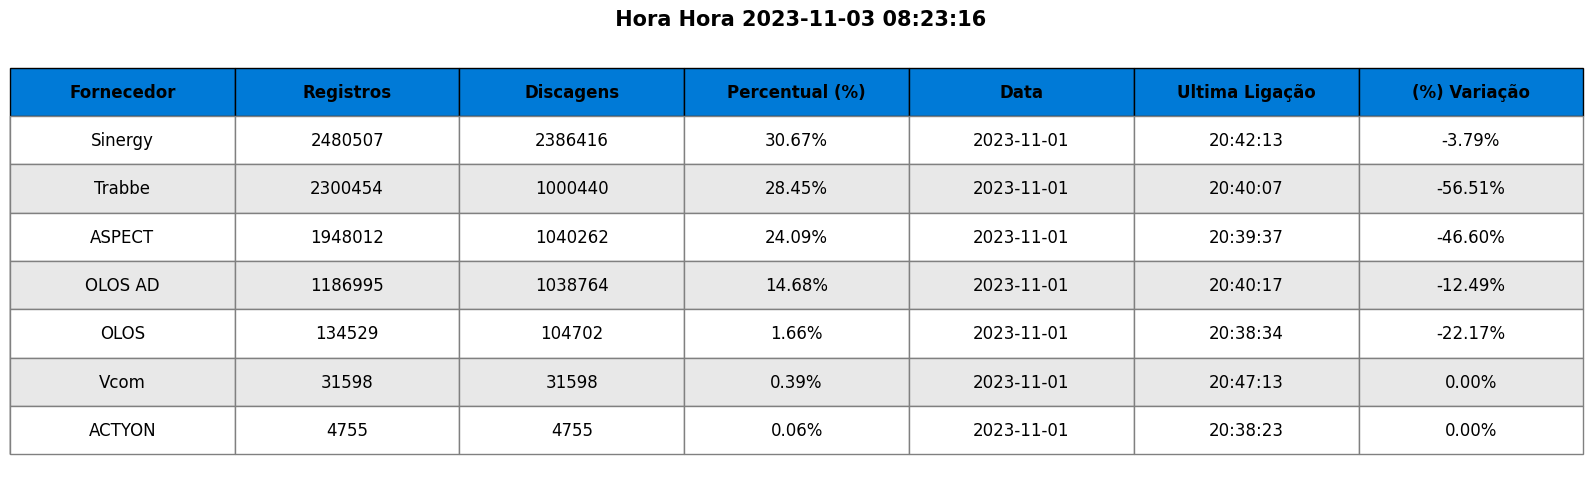

In [40]:
filename  = os.path.basename(arquivo_mais_recente)

data_modificacao = last_modified_file_date(path=arquivo_mais_recente)

datetimenow = datetime.now().strftime('%Y-%m-%d %H:%M:%S')



Mensagem = f"""⚠️ HORA HORA {datetimenow}\n 
        ✅ Ultimo arquivo :{filename} -\n
        ✅ Ultima modificação :{data_modificacao} \n
        ✅ Ultima Hora Arquivo : {last_hour} \n
        ✅ Registros : {qt_registros} 
        ✅ Finished : {finished_lines} 
        ❌   Error : {erros_lines}
        """
send_message(token=token, 
             chat_id= chat,
               message=Mensagem)

fig , ax = plt.subplots(figsize=(5,5.4))
Logo_TIM = r'\\192.168.10.21\saturno\24 - MIS\07 - TIM\42 - Acompanhamento Reports Python\02 - Hora hora\TIM.png'
logo = Image.open(Logo_TIM)
col_widths = [0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
# Removendo eixos
ax.axis('off')
# Adicionando um título à tabela
titulo = f" Hora Hora {datetimenow}"
ax.set_facecolor('#F0F0F0') 
ax.set_title(titulo, fontsize=15, fontweight='bold', loc='center', pad=20)
tab = table(ax,df_table_full, loc='center', cellLoc='center', colWidths=col_widths)
# Personalizando o estilo da tabela
tab.auto_set_font_size(True)
tab.set_fontsize(12)
tab.scale(2.9, 2.9)  # Ajuste o tamanho da tabela conforme necessário
# fig.figimage(logo, xo=720, yo=310)
# Personalizando células específicas
for i in range(len(df_table_full.columns)):
    tab.get_celld()[0, i].set_facecolor("#007AD7")  # Fundo amarelo para a primeira linha (cabeçalho)
    tab.get_celld()[0, i].set_fontsize(13)  # Tamanho de fonte maior para o cabeçalho
    tab.get_celld()[0, i].set_text_props(weight='bold')

  # Texto em negrito para o cabeçalho
    # ... Continue personalizando outras células, como bordas, cores de fundo, cores de texto, etc.
# Adicionando fundo de grade cinza claro intercalando com branco
for i, row in enumerate(df_table_full.iterrows()):
    color = "white" if i % 2 == 0 else "#E8E8E8"  # Alterne entre branco e cinza claro
    for j, cell in enumerate(row[1]):
        cell_obj = tab.get_celld()[i + 1, j]
        cell_obj.set_facecolor(color)  # Define a cor de fundo da célula
        cell_obj.set_edgecolor("gray")  # Cor das bordas
        cell_obj.set_linewidth(1.0) 

# Pintando a fonte dos valores negativos de vermelho
# for i, row in enumerate(df_table_full.iterrows()):
#     for j, cell in enumerate(row[1]):
#         cell_obj = tab.get_celld()[i + 1, j]
#         if '-' in cell :
#             cell_obj.get_text().set_color('red')

imag_path = r'\\192.168.10.21\saturno\24 - MIS\07 - TIM\42 - Acompanhamento Reports Python\02 - Hora hora\horahora.png'

plt.savefig(r'\\192.168.10.21\saturno\24 - MIS\07 - TIM\42 - Acompanhamento Reports Python\02 - Hora hora\horahora.png', bbox_inches='tight', pad_inches=0.5)
# print_path(path_list= pasta,image_save_path=image_save)

# sender_photo(token=token, chat= chat, caminho= image_save)

# print_web_powerbi(url_web="https://app.powerbi.com/view?r=eyJrIjoiZWNmZDZkMTItYjA3OC00NGQyLWI0YzYtZWJhY2M5ZDhiNzhlIiwidCI6IjM1OTc1MTc0LTZhNWYtNDM4Ni1iOGRmLWIxOGEyZGMzNWY1YyJ9"
#                   ,save_png=r"\\192.168.10.21\saturno\24 - MIS\07 - TIM\42 - Acompanhamento Reports Python\02 - Hora hora\powerbi.png")

# sender_photo(token=token, chat= chat
#          , caminho= imag_path)

In [ ]:
import numpy as np 
file_path = r"\\192.168.10.21\saturno\24 - MIS\07 - TIM\02 - Hora a Hora\01 - Output Bases\Relatorio Analitico"
arquivo_mais_recente = last_file(file_path=file_path)
log = r"\\192.168.10.21\saturno\24 - MIS\07 - TIM\02 - Hora a Hora\00 - Projeto Alteryx\Fluxo Hora a Hora.log.txt"

erros_lines, finished_lines = read_log(log)
df = pd.read_csv(arquivo_mais_recente,encoding='ISO-8859-1', sep= '|')
percentil = np.round(df.Fornecedor.value_counts(normalize=True)*100,2).reset_index().rename(columns= {'proportion':'Percentual (%)'})
df_table = df['Fornecedor'].value_counts().reset_index().rename(columns= {'count':'Registros'})
df_table = df_table.merge(percentil)
df_table['Data'] = df['Data Acionamento'][0]
df_table['Hora'] = df['HORA'].max()
df_table

In [ ]:
df_table = df_table.rename(index={0:'',1 :'',2:'',3:''})
df_table

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
from pandas.plotting import table

In [ ]:
fig , ax = plt.subplots(figsize=(3.8,3))
Logo_TIM = r'\\192.168.10.21\saturno\24 - MIS\07 - TIM\42 - Acompanhamento Reports Python\02 - Hora hora\TIM.png'
logo = Image.open(Logo_TIM)
col_widths = [0.2, 0.2,0.2,0.2,0.2]
# Removendo eixos
ax.axis('off')
# Adicionando um título à tabela
titulo = f" Hora Hora "
ax.set_facecolor('#F0F0F0') 
ax.set_title(titulo, fontsize=15, fontweight='bold', loc='center', pad=20)
tab = table(ax,df_table, loc='center', cellLoc='center', colWidths=col_widths)
# Personalizando o estilo da tabela
tab.auto_set_font_size(True)
tab.set_fontsize(12)
tab.scale(2.9, 2.9)  # Ajuste o tamanho da tabela conforme necessário
fig.figimage(logo, xo=680, yo=250)
# Personalizando células específicas
for i in range(len(df_table.columns)):
    tab.get_celld()[0, i].set_facecolor("#007AD7")  # Fundo amarelo para a primeira linha (cabeçalho)
    tab.get_celld()[0, i].set_fontsize(13)  # Tamanho de fonte maior para o cabeçalho
    tab.get_celld()[0, i].set_text_props(weight='bold')

  # Texto em negrito para o cabeçalho
    # ... Continue personalizando outras células, como bordas, cores de fundo, cores de texto, etc.
# Adicionando fundo de grade cinza claro intercalando com branco
for i, row in enumerate(df_table.iterrows()):
    color = "white" if i % 2 == 0 else "#E8E8E8"  # Alterne entre branco e cinza claro
    for j, cell in enumerate(row[1]):
        cell_obj = tab.get_celld()[i + 1, j]
        cell_obj.set_facecolor(color)  # Define a cor de fundo da célula
        cell_obj.set_edgecolor("gray")  # Cor das bordas
        cell_obj.set_linewidth(1.0) 


In [ ]:
fig , ax = plt.subplots(figsize=(3.5,3))
fig.figimage(logo, xo=0.1, yo=0.1)
ax.axis('off')

In [ ]:
nova_largura = 200  # Substitua pelo valor desejado
nova_altura = 50  # Substitua pelo valor desejado
logo_redimensionada = logo.resize((nova_largura, nova_altura))

# Salvar a imagem redimensionada ou usá-la em seu gráfico
logo_redimensionada.save('logo_redimensionada.png')

In [ ]:
# Calcule as coordenadas para posicionar a logo no canto superior direito
xo = fig_width - (logo.width / 2)  # Ajuste conforme necessário
yo = fig_height - (logo.height / 2)  # Ajuste conforme necessário


In [ ]:
xo, yo 